T-S plots for 2015.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [25]:
Jan = sorted(glob.glob('/results/SalishSea/hindcast/*jan15/*1h*grid_T*'))
Feb = sorted(glob.glob('/results/SalishSea/hindcast/*feb15/*1h*grid_T*'))
Mar = sorted(glob.glob('/results/SalishSea/hindcast/*mar15/*1h*grid_T*'))
Apr = sorted(glob.glob('/results/SalishSea/hindcast/*apr15/*1h*grid_T*'))
May = sorted(glob.glob('/results/SalishSea/hindcast/*may15/*1h*grid_T*'))
Jun = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
Jul = sorted(glob.glob('/results/SalishSea/hindcast/*jul15/*1h*grid_T*'))
Aug = sorted(glob.glob('/results/SalishSea/hindcast/*aug15/*1h*grid_T*'))
Sep1 = sorted(glob.glob('/results/SalishSea/hindcast/*sep15/*1h*grid_T*'))
Sep2 = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*sep15/*1h*grid_T*'))[5:]
Sep = Sep1 + Sep2
Oct = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*oct15/*1h*grid_T*'))
Nov = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*nov15/*1h*grid_T*'))
Dec = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*dec15/*1h*grid_T*'))

In [28]:
with nc_tools.scDataset(Jan) as f:
    Jansal = f.variables['vosaline'][:,:,558,155]
    Jantem = f.variables['votemper'][:,:,558,155]
    Janssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Feb) as f:
    Febsal = f.variables['vosaline'][:,:,558,155]
    Febtem = f.variables['votemper'][:,:,558,155]
    Febssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Mar) as f:
    Marsal = f.variables['vosaline'][:,:,558,155]
    Martem = f.variables['votemper'][:,:,558,155]
    Marssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Apr) as f:
    Aprsal = f.variables['vosaline'][:,:,558,155]
    Aprtem = f.variables['votemper'][:,:,558,155]
    Aprssh = f.variables['sossheig'][:,558,155]    
with nc_tools.scDataset(May) as f:
    Maysal = f.variables['vosaline'][:,:,558,155]
    Maytem = f.variables['votemper'][:,:,558,155]
    Mayssh = f.variables['sossheig'][:,558,155] 
with nc_tools.scDataset(Jun) as f:
    Junsal = f.variables['vosaline'][:,:,558,155]
    Juntem = f.variables['votemper'][:,:,558,155]
    Junssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Jul) as f:
    Julsal = f.variables['vosaline'][:,:,558,155]
    Jultem = f.variables['votemper'][:,:,558,155]
    Julssh = f.variables['sossheig'][:,558,155] 
with nc_tools.scDataset(Aug) as f:
    Augsal = f.variables['vosaline'][:,:,558,155]
    Augtem = f.variables['votemper'][:,:,558,155]
    Augssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Sep) as f:
    Sepsal = f.variables['vosaline'][:,:,558,155]
    Septem = f.variables['votemper'][:,:,558,155]
    Sepssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Oct) as f:
    Octsal = f.variables['vosaline'][:,:,558,155]
    Octtem = f.variables['votemper'][:,:,558,155]
    Octssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Nov) as f:
    Novsal = f.variables['vosaline'][:,:,558,155]
    Novtem = f.variables['votemper'][:,:,558,155]
    Novssh = f.variables['sossheig'][:,558,155]
with nc_tools.scDataset(Dec) as f:
    Decsal = f.variables['vosaline'][:,:,558,155]
    Dectem = f.variables['votemper'][:,:,558,155]
    Decssh = f.variables['sossheig'][:,558,155]       

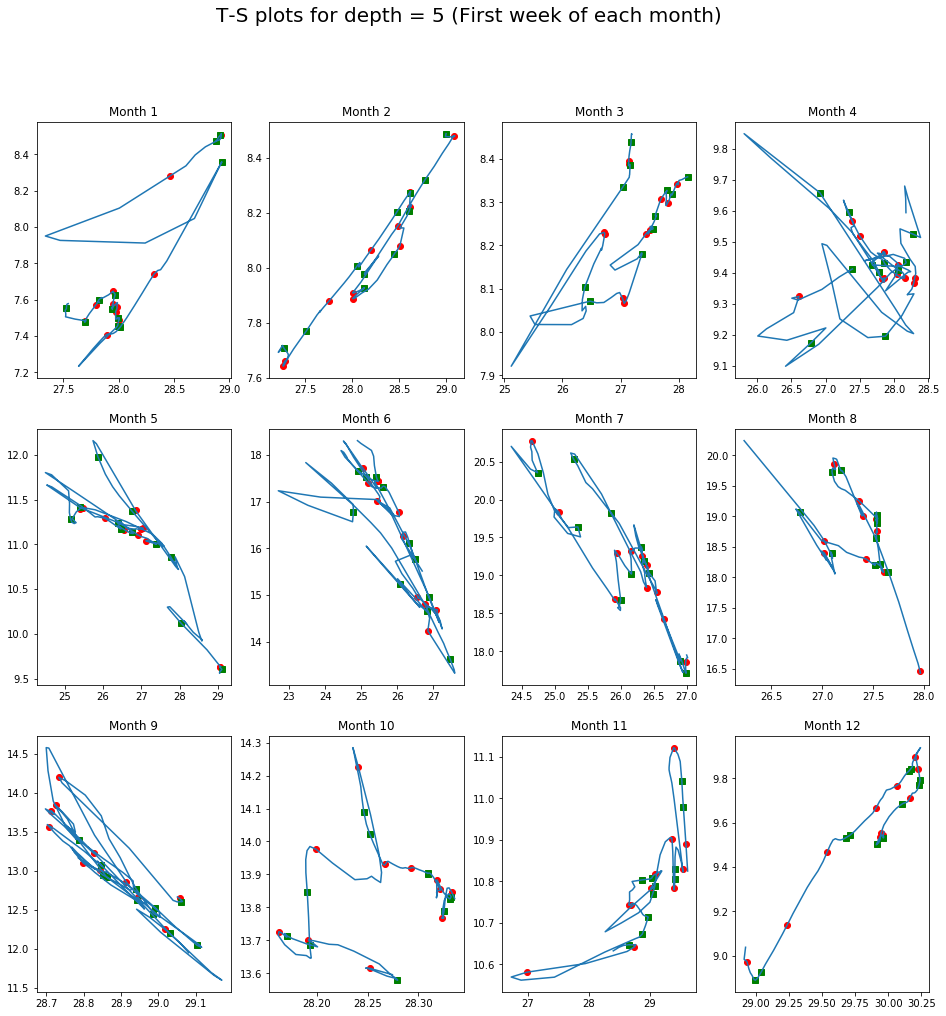

In [112]:
fig,axarr = plt.subplots(3,4, figsize = ((16,16)))
l=0
d=5
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:128,:7,558,155]
        t = f.variables['votemper'][:128,:7,558,155]
        ssh = f.variables['sossheig'][:128,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    for m in highs:
        axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    for n in lows:
        axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'gs')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title("Month " + str(l+1))
    l = l+1
fig.suptitle('T-S plots for depth = 5 (First week of each month)', fontsize = 20)

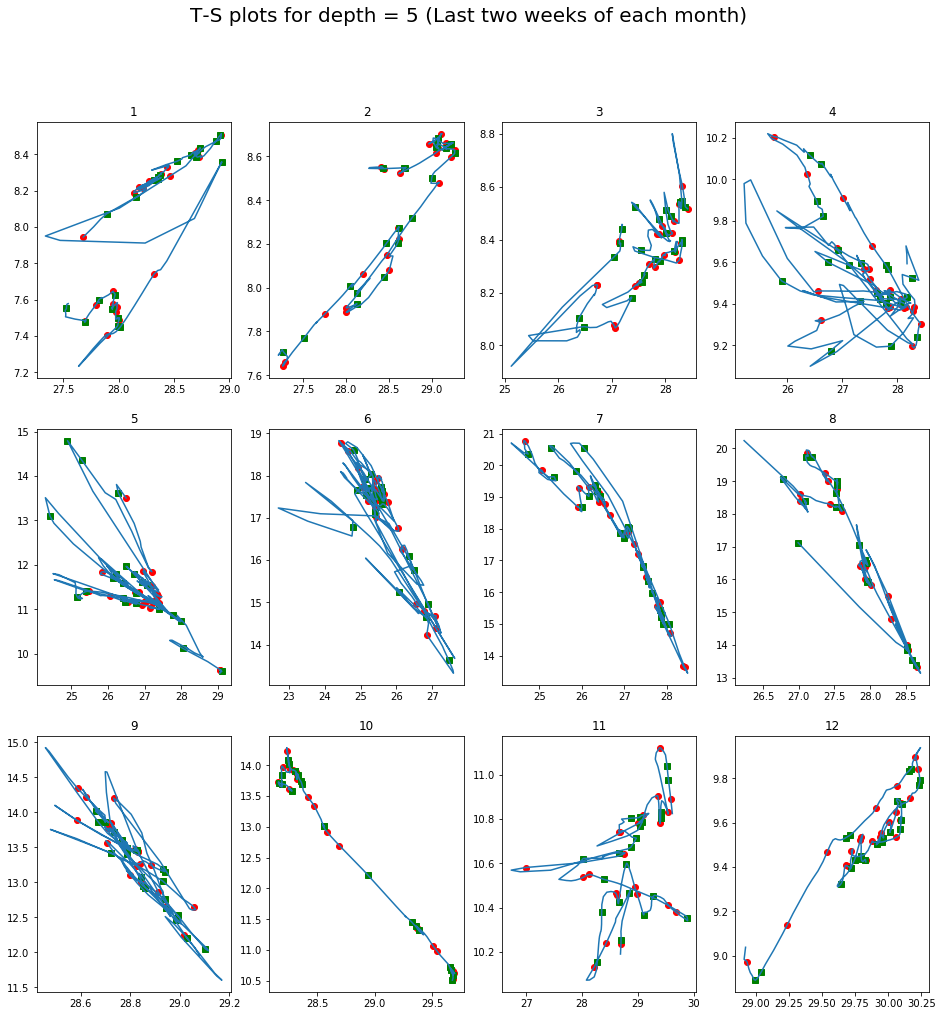

In [113]:
fig,axarr = plt.subplots(3,4, figsize = (16,16))
l=0
d=5
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:256,:7,558,155]
        t = f.variables['votemper'][:256,:7,558,155]
        ssh = f.variables['sossheig'][:256,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    for m in highs:
        axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    for n in lows:
        axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'gs')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title(str(l+1))
    l = l+1
fig.suptitle('T-S plots for depth = 5 (Last two weeks of each month)', fontsize=20)

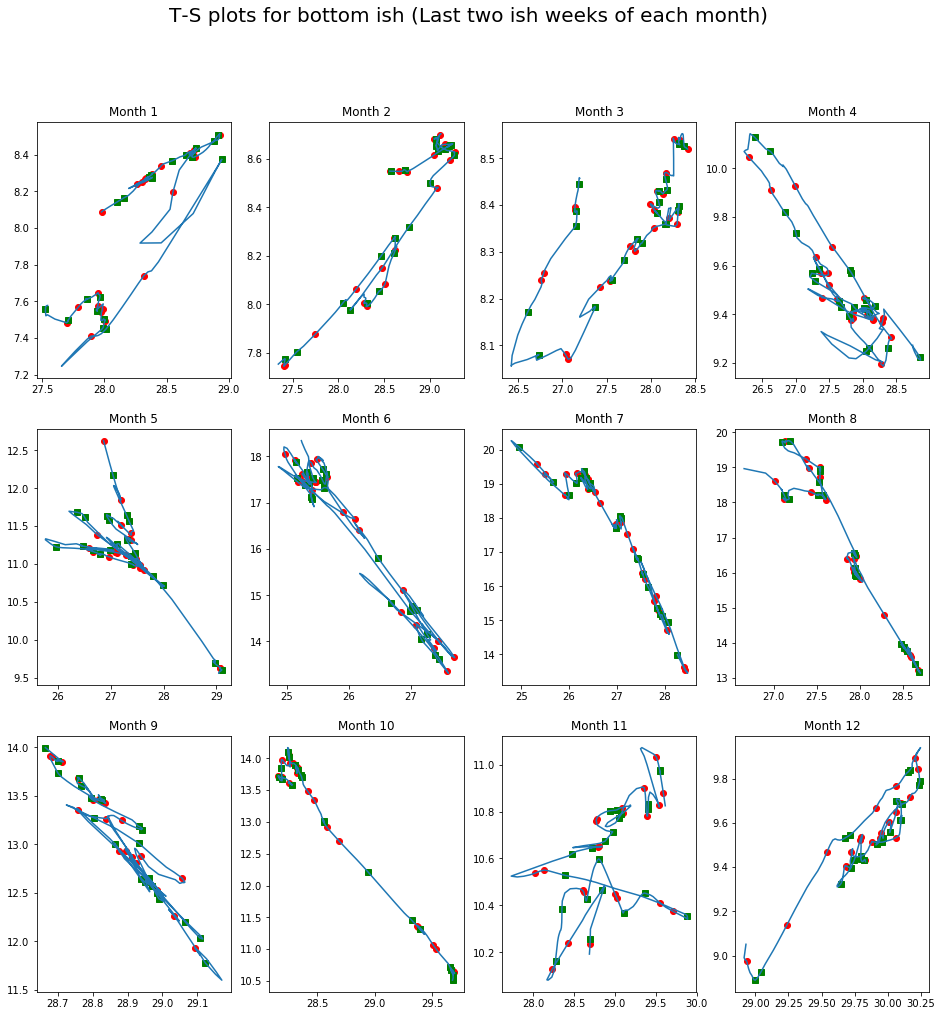

In [114]:
fig,axarr = plt.subplots(3,4, figsize = (16,16))
l=0
d=6
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:256,:7,558,155]
        t = f.variables['votemper'][:256,:7,558,155]
        ssh = f.variables['sossheig'][:256,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    for m in highs:
        axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    for n in lows:
        axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'gs')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title("Month "+ str(l+1))
    l = l+1
fig.suptitle('T-S plots for bottom ish (Last two ish weeks of each month)', fontsize=20)

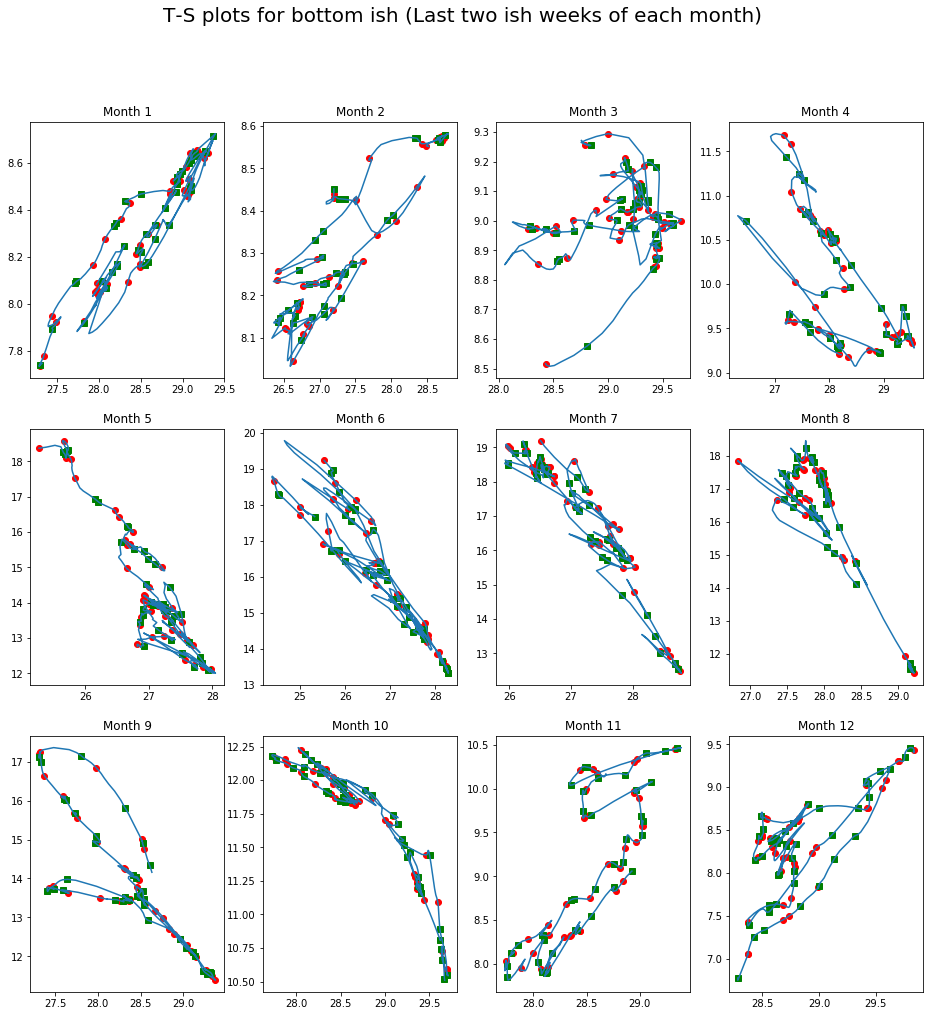

In [115]:
fig,axarr = plt.subplots(3,4, figsize = (16,16))
l=0
d=6
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][256:,:7,558,155]
        t = f.variables['votemper'][256:,:7,558,155]
        ssh = f.variables['sossheig'][256:,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    for m in highs:
        axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    for n in lows:
        axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'gs')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title("Month " + str(l+1))
    l = l+1
fig.suptitle('T-S plots for bottom ish (Last two ish weeks of each month)', fontsize=20)

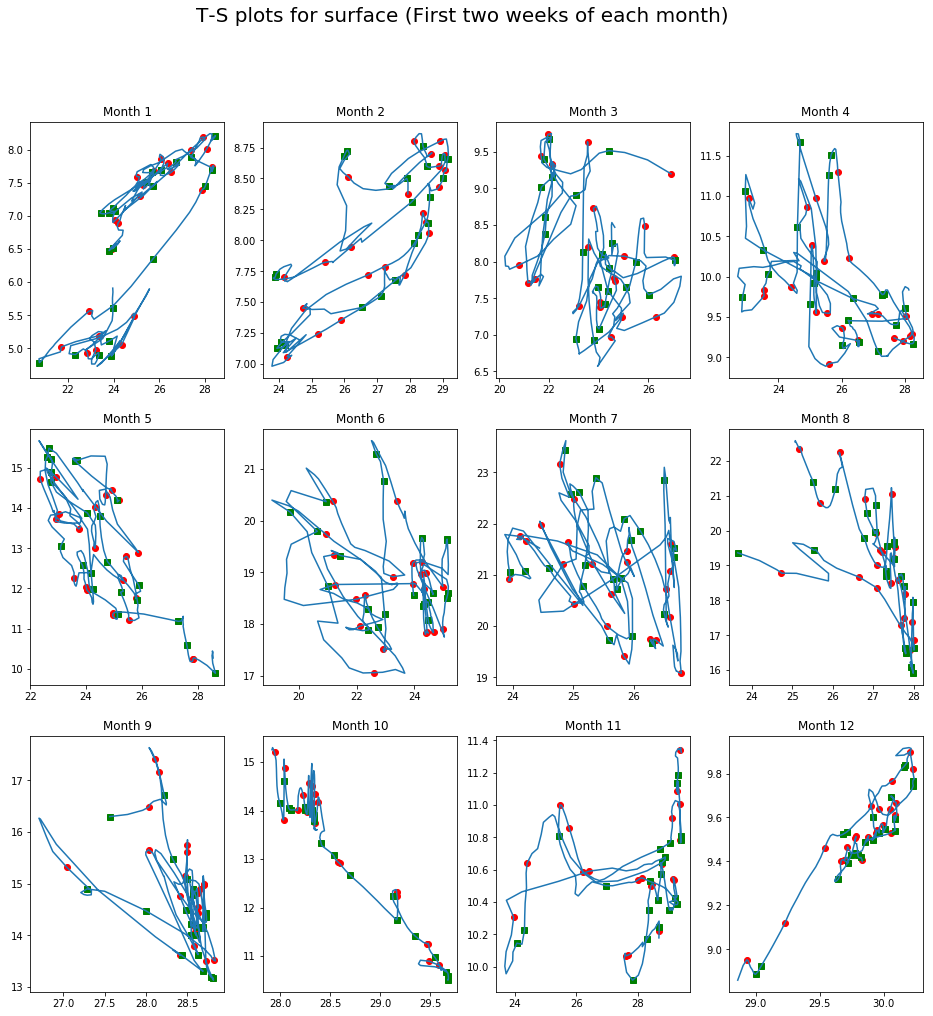

In [116]:
fig,axarr = plt.subplots(3,4, figsize = (16,16))
l=0
d=0
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:256,:7,558,155]
        t = f.variables['votemper'][:256,:7,558,155]
        ssh = f.variables['sossheig'][:256,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    for m in highs:
        axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    for n in lows:
        axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'gs')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title("Month " + str(l+1))
    l = l+1
fig.suptitle('T-S plots for surface (First two weeks of each month)', fontsize=20)